# Renata Capstone project

This notebook will be mainly used for the capstone project

## Week 1 Assignment

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Week 3 Assignment

### Part 1: Create dataframe based on Wikipedia table for neighborhoods in Toronto 

Scrape data from Wikipedia and obtain the data that is in the table of postal codes and transform the data into a pandas dataframe

- Step 1: Scrape table and turn read into dataframe (the dataframe will consist of three columns: PostalCode, Borough, and Neighborhood)
- Step 2: Drop rows with a borough that is not assigned (Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned)
- Step 3: In the last cell, use the .shape method to print the number of rows of your dataframe.

Download all the dependencies needed

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


#### Step 1: Scrape wikipedia page
I have decided to use the pandas to scrape the wikipedia page

In [4]:
wiki_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header = 0)
df1 = wiki_table[0]
df1.head()

Postal Code           Borough               Neighborhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

In [5]:
#checking shape
df1.shape

(180, 3)

#### Step 2: Drop rows with boroughs that are not assigned

In [6]:
# Get names of indexes for which column Borough has value 'Not assigned'
indexNames = df1[ df1['Borough'] == 'Not assigned' ].index

# Delete these row indexes from dataFrame
df1_dropped = df1.drop(indexNames, inplace = False)
df1_dropped.head()

Postal Code           Borough                                 Neighborhood
2         M3A        North York                                    Parkwoods
3         M4A        North York                             Victoria Village
4         M5A  Downtown Toronto                    Regent Park, Harbourfront
5         M6A        North York             Lawrence Manor, Lawrence Heights
6         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

In [7]:
df1_dropped.shape

(103, 3)

In [8]:
#reseting index
df1_dropped = df1_dropped.reset_index(drop=True, inplace=False)
df1_dropped.head(12)

Postal Code           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
5          M9A         Etobicoke   
6          M1B       Scarborough   
7          M3B        North York   
8          M4B         East York   
9          M5B  Downtown Toronto   
10         M6B        North York   
11         M9B         Etobicoke   

                                         Neighborhood  
0                                           Parkwoods  
1                                    Victoria Village  
2                           Regent Park, Harbourfront  
3                    Lawrence Manor, Lawrence Heights  
4         Queen's Park, Ontario Provincial Government  
5             Islington Avenue, Humber Valley Village  
6                                      Malvern, Rouge  
7                                           Don Mills  
8                     Parkview Hill, Woodbine Gardens  
9                            Garden District, Ryerson  
10                                          Glencairn  
11  West Deane Park, Princess Gardens, Martin Grov...

#### Step 3: Use the .shape method to print the number of rows of your dataframe.

In [9]:
df1_dropped.shape

(103, 3)

### Part 2: Create a dataframe that includes the latitude and longitudinal coordinates of each postal code/borough
 In order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. The csv file will be used.

In [10]:
#read csv file
df_co = pd.read_csv('http://cocl.us/Geospatial_data')
df_co.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [11]:
#merge dataframes based on postal code
df2 = pd.merge(df1_dropped,df_co)
df2.head(12)

Postal Code           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
5          M9A         Etobicoke   
6          M1B       Scarborough   
7          M3B        North York   
8          M4B         East York   
9          M5B  Downtown Toronto   
10         M6B        North York   
11         M9B         Etobicoke   

                                         Neighborhood   Latitude  Longitude  
0                                           Parkwoods  43.753259 -79.329656  
1                                    Victoria Village  43.725882 -79.315572  
2                           Regent Park, Harbourfront  43.654260 -79.360636  
3                    Lawrence Manor, Lawrence Heights  43.718518 -79.464763  
4         Queen's Park, Ontario Provincial Government  43.662301 -79.389494  
5             Islington Avenue, Humber Valley Village  43.667856 -79.532242  
6                                      Malvern, Rouge  43.806686 -79.194353  
7                                           Don Mills  43.745906 -79.352188  
8                     Parkview Hill, Woodbine Gardens  43.706397 -79.309937  
9                            Garden District, Ryerson  43.657162 -79.378937  
10                                          Glencairn  43.709577 -79.445073  
11  West Deane Park, Princess Gardens, Martin Grov...  43.650943 -79.554724

### Part 3: Explore and cluster the neighborhoods in Toronto
Replicating the same analysis as with the New York City data. I will do this for the entire Toronto area

#### Step 1: Use geopy library to get the latitude and longitude values of New York City.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>to_explorer</em>, as shown below.

In [12]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Step 2: Create a map of Toronto with neighborhoods superimposed on top.

In [13]:
# create map of Toronto using latitude and longitude values
map_to = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Borough'], df2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)  
    
map_to

#### Step 3: Explore neighborhoods in Toronto
Now we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

Define Foursquare credentials and Version

In [14]:
CLIENT_ID = 'KLQ3QKOXT34YAZOCUGPDS4EN0XDZJI5J0QDVM2HXKSKPFW1Z' # your Foursquare ID
CLIENT_SECRET = 'HBOI4VNNCH1PQ01HRFPF33OFJEPJX22YYWOHHJ54IZMIIALH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KLQ3QKOXT34YAZOCUGPDS4EN0XDZJI5J0QDVM2HXKSKPFW1Z
CLIENT_SECRET:HBOI4VNNCH1PQ01HRFPF33OFJEPJX22YYWOHHJ54IZMIIALH


Create a function to get the nearby venues with relevant information for of all neighborhoods in Toronto and store in a dataframe

In [15]:
#creating function
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
#run function and create new dataframe
to_venues = getNearbyVenues(names=df2['Neighborhood'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [17]:
#print shape of dataframe and show first 5 rows
print(to_venues.shape)
to_venues.head()

(2130, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods              43.753259              -79.329656   
1         Parkwoods              43.753259              -79.329656   
2  Victoria Village              43.725882              -79.315572   
3  Victoria Village              43.725882              -79.315572   
4  Victoria Village              43.725882              -79.315572   

                    Venue  Venue Latitude  Venue Longitude  \
0         Brookbanks Park       43.751976       -79.332140   
1           Variety Store       43.751974       -79.333114   
2  Victoria Village Arena       43.723481       -79.315635   
3               Portugril       43.725819       -79.312785   
4             Tim Hortons       43.725517       -79.313103   

          Venue Category  
0                   Park  
1      Food & Drink Shop  
2           Hockey Arena  
3  Portuguese Restaurant  
4            Coffee Shop

Check how many venues were returned for each neighborhood

In [18]:
to_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                               5   
Alderwood, Long Branch                                                  9   
Bathurst Manor, Wilson Heights, Downsview North                        22   
Bayview Village                                                         4   
Bedford Park, Lawrence Manor East                                      24   
Berczy Park                                                            59   
Birch Cliff, Cliffside West                                             4   
Brockton, Parkdale Village, Exhibition Place                           23   
Business reply mail Processing Centre, South Ce...                     16   
CN Tower, King and Spadina, Railway Lands, Harb...                     16   
Caledonia-Fairbanks                                                     4   
Canada Post Gateway Processing Centre                                  13   
Cedarbrae                                                               8   
Central Bay Street                                                     68   
Christie                                                               16   
Church and Wellesley                                                   74   
Clarks Corners, Tam O'Shanter, Sullivan                                13   
Cliffside, Cliffcrest, Scarborough Village West                         3   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             32   
Davisville North                                                       10   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                        4   
Don Mills                                                              27   
Dorset Park, Wexford Heights, Scarborough Town ...                      6   
Downsview                                                              15   
Dufferin, Dovercourt Village                                           17   
East Toronto, Broadview North (Old East York)                           4   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                      7   
Fairview, Henry Farm, Oriole                                           65   
First Canadian Place, Underground city                                100   
Forest Hill North & West, Forest Hill Road Park                         4   
Garden District, Ryerson                                              100   
Glencairn                                                               5   
Golden Mile, Clairlea, Oakridge                                         8   
Guildwood, Morningside, West Hill                                       8   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          24   
Hillcrest Village                                                       4   
Humber Summit                                                           3   
Humberlea, Emery                                                        1   
Humewood-Cedarvale                                                      4   
India Bazaar, The Beaches West                                         21   
Kennedy Park, Ionview, East Birchmount Park                             5   
Kensington Market, Chinatown, Grange Park                              59   
Kingsview Village, St. Phillips, Martin Grove G...                      4   
Lawrence Manor, Lawrence Heights                                       12   
Lawrence Park                                                           4   
Leaside                                                                34   
Little Portugal, Trinity                                               44   
Malvern, Rouge                                                          1   
Milliken, Agincourt North, Steeles East, L'Amor.

Checking how many unique categories there are from all venues

In [19]:
print('There are {} uniques categories.'.format(len(to_venues['Venue Category'].unique())))

There are 268 uniques categories.


#### Step 4: Analyze each neighborhood

In [20]:
# one hot encoding for better analyses
to_onehot = pd.get_dummies(to_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhood'] = to_venues['Neighborhood']

#to get neighborhoods as first column, remove neighborhood column from df and save it in a variable
neighborhood_col = 'Neighborhood'
first_col = to_onehot.pop(neighborhood_col)
#Now use insert() function and insert the popped column into first position of the dataframe.
to_onehot.insert(0, neighborhood_col, first_col)

to_onehot.head()

Neighborhood  Accessories Store  Afghan Restaurant  Airport  \
0         Parkwoods                  0                  0        0   
1         Parkwoods                  0                  0        0   
2  Victoria Village                  0                  0        0   
3  Victoria Village                  0                  0        0   
4  Victoria Village                  0                  0        0   

   Airport Food Court  Airport Lounge  Airport Service  Airport Terminal  \
0                   0               0                0                 0   
1                   0               0                0                 0   
2                   0               0                0                 0   
3                   0               0                0                 0   
4                   0               0                0                 0   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  Art Museum  \
0                    0             0         0            0           0   
1                    0             0         0            0           0   
2                    0             0         0            0           0   
3                    0             0         0            0           0   
4                    0             0         0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                    0                 0                   0            0   
1                    0                 0                   0            0   
2                    0                 0                   0            0   
3                    0                 0                   0            0   
4                    0                 0                   0            0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0              0          0           0           0       0     0    0   
1              0          0           0           0       0     0    0   
2              0          0           0           0       0     0    0   
3              0          0           0           0       0     0    0   
4              0          0           0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0               0                 0                 0                   0   
1               0                 0                 0                   0   
2               0                 0                 0                   0   
3               0                 0                 0                   0   
4               0                 0                 0                   0   

   Beach  Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  \
0      0                0         0           0                   0   
1      0                0         0           0                   0   
2      0                0         0           0                   0   
3      0                0         0           0                   0   
4      0                0         0           0                   0   

   Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  \
0          0       0              0          0         0   
1          0       0              0          0         0   
2          0       0              0          0         0   
3          0       0              0          0         0   
4          0       0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0        0            0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0                0         0             0              0

In [21]:
#check new dataframe size
to_onehot.shape

(2130, 268)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [22]:
to_grouped = to_onehot.groupby('Neighborhood').mean().reset_index()
to_grouped

Neighborhood  Accessories Store  \
0                                           Agincourt           0.000000   
1                              Alderwood, Long Branch           0.000000   
2     Bathurst Manor, Wilson Heights, Downsview North           0.000000   
3                                     Bayview Village           0.000000   
4                   Bedford Park, Lawrence Manor East           0.000000   
5                                         Berczy Park           0.000000   
6                         Birch Cliff, Cliffside West           0.000000   
7        Brockton, Parkdale Village, Exhibition Place           0.000000   
8   Business reply mail Processing Centre, South C...           0.000000   
9   CN Tower, King and Spadina, Railway Lands, Har...           0.000000   
10                                Caledonia-Fairbanks           0.000000   
11              Canada Post Gateway Processing Centre           0.000000   
12                                          Cedarbrae           0.000000   
13                                 Central Bay Street           0.000000   
14                                           Christie           0.000000   
15                               Church and Wellesley           0.000000   
16            Clarks Corners, Tam O'Shanter, Sullivan           0.000000   
17    Cliffside, Cliffcrest, Scarborough Village West           0.000000   
18                     Commerce Court, Victoria Hotel           0.000000   
19                                         Davisville           0.000000   
20                                   Davisville North           0.000000   
21   Del Ray, Mount Dennis, Keelsdale and Silverthorn           0.000000   
22                                          Don Mills           0.000000   
23  Dorset Park, Wexford Heights, Scarborough Town...           0.000000   
24                                          Downsview           0.000000   
25                       Dufferin, Dovercourt Village           0.000000   
26      East Toronto, Broadview North (Old East York)           0.000000   
27  Eringate, Bloordale Gardens, Old Burnhamthorpe...           0.000000   
28                       Fairview, Henry Farm, Oriole           0.000000   
29             First Canadian Place, Underground city           0.000000   
30    Forest Hill North & West, Forest Hill Road Park           0.000000   
31                           Garden District, Ryerson           0.000000   
32                                          Glencairn           0.000000   
33                    Golden Mile, Clairlea, Oakridge           0.000000   
34                  Guildwood, Morningside, West Hill           0.000000   
35  Harbourfront East, Union Station, Toronto Islands           0.000000   
36                      High Park, The Junction South           0.000000   
37                                  Hillcrest Village           0.000000   
38                                      Humber Summit           0.000000   
39                                   Humberlea, Emery           0.000000   
40                                 Humewood-Cedarvale           0.000000   
41                     India Bazaar, The Beaches West           0.000000   
42        Kennedy Park, Ionview, East Birchmount Park           0.000000   
43          Kensington Market, Chinatown, Grange Park           0.000000   
44  Kingsview Village, St. Phillips, Martin Grove ...           0.000000   
45                   Lawrence Manor, Lawrence Heights           0.083333   
46                                      Lawrence Park           0.000000   
47                                            Leaside           0.000000   
48                           Little Portugal, Trinity           0.000000   
49                                     Malvern, Rouge           0.000000   
50  Milliken, Agincourt North, Steeles East, L'Amo...           0.000000   
51  Mimico NW, The Queensway West, South of Bloor,...           0.000000   
52           

In [23]:
#check size
to_grouped.shape

(96, 268)

Print each neighborhood along with the top 5 most common venues

In [24]:
num_top_venues = 5

for hood in to_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = to_grouped[to_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Clothing Store   0.2
1               Skating Rink   0.2
2             Breakfast Spot   0.2
3                     Lounge   0.2
4  Latin American Restaurant   0.2


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.22
1        Pharmacy  0.11
2    Skating Rink  0.11
3  Sandwich Place  0.11
4    Dance Studio  0.11


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                Coffee Shop  0.09
1                       Bank  0.09
2                 Restaurant  0.05
3                       Park  0.05
4  Middle Eastern Restaurant  0.05


----Bayview Village----
                 venue  freq
0  Japanese Restaurant  0.25
1                 Bank  0.25
2   Chinese Restaurant  0.25
3                 Café  0.25
4        Movie Theater  0.00


----Bedford Park, Lawrence Manor East----
                     venue  freq
0       Italian Restaurant  0.08
1              Co

Convert to dataframe

In [25]:
#write a function to sort venues in decending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
#Create dataframe displaying the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = to_grouped['Neighborhood']

for ind in np.arange(to_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(to_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Agincourt                Lounge   
1                           Alderwood, Long Branch           Pizza Place   
2  Bathurst Manor, Wilson Heights, Downsview North                  Bank   
3                                  Bayview Village                  Café   
4                Bedford Park, Lawrence Manor East            Restaurant   

  2nd Most Common Venue      3rd Most Common Venue 4th Most Common Venue  \
0        Breakfast Spot  Latin American Restaurant          Skating Rink   
1          Dance Studio                        Pub                   Gym   
2           Coffee Shop             Ice Cream Shop           Pizza Place   
3                  Bank        Japanese Restaurant    Chinese Restaurant   
4    Italian Restaurant                Coffee Shop        Sandwich Place   

       5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0             Clothing Store           Yoga Studio            Donut Shop   
1                   Pharmacy           Coffee Shop        Sandwich Place   
2  Middle Eastern Restaurant            Restaurant     Mobile Phone Shop   
3                Yoga Studio        Discount Store   Distribution Center   
4                        Pub              Pharmacy     Indian Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0        Discount Store   Distribution Center                Dog Run  
1          Skating Rink          Dessert Shop     Dim Sum Restaurant  
2         Deli / Bodega   Fried Chicken Joint         Sandwich Place  
3               Dog Run      Doner Restaurant             Donut Shop  
4                  Café   Japanese Restaurant                Butcher

In [33]:
#check size
neighborhoods_venues_sorted.shape

(96, 11)

#### Step 5: Cluster neighborhoods

Find the best k to use by finding the elbow point

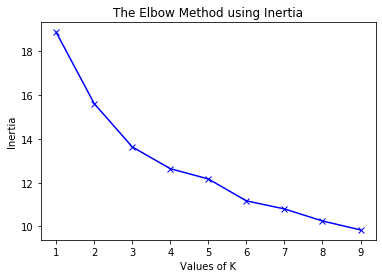

In [88]:
from sklearn import metrics 
import matplotlib.pyplot as plt

to_grouped_clustering = to_grouped.drop('Neighborhood', 1)
inertia=[]
mapping={}
K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(to_grouped_clustering)
    
    inertia.append(kmeans.inertia_)
    
    mapping[k] = kmeans.inertia_ 
    
plt.plot(K, inertia, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

It is not very clear where the elbow point is, but I have selected 6 as the elbow point

Run K-means to cluster the neighborhood into 6 clusters

In [73]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(to_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 0, 1, 0, 1, 1, 1, 1, 1, 5, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1,
       0, 1, 0, 1, 1, 2, 1, 0])

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [75]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

to_merged = df2

# merge to_grouped with to_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how = 'right') 

to_merged.head(10) 

Postal Code           Borough                                 Neighborhood  \
0          M3A        North York                                    Parkwoods   
1          M4A        North York                             Victoria Village   
2          M5A  Downtown Toronto                    Regent Park, Harbourfront   
3          M6A        North York             Lawrence Manor, Lawrence Heights   
4          M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   
6          M1B       Scarborough                               Malvern, Rouge   
7          M3B        North York                                    Don Mills   
13         M3C        North York                                    Don Mills   
8          M4B         East York              Parkview Hill, Woodbine Gardens   
9          M5B  Downtown Toronto                     Garden District, Ryerson   

     Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0   43.753259 -79.329656               4     Food & Drink Shop   
1   43.725882 -79.315572               1          Hockey Arena   
2   43.654260 -79.360636               1           Coffee Shop   
3   43.718518 -79.464763               1        Clothing Store   
4   43.662301 -79.389494               1           Coffee Shop   
6   43.806686 -79.194353               1  Fast Food Restaurant   
7   43.745906 -79.352188               1                   Gym   
13  43.725900 -79.340923               1                   Gym   
8   43.706397 -79.309937               1           Pizza Place   
9   43.657162 -79.378937               1        Clothing Store   

   2nd Most Common Venue       3rd Most Common Venue  \
0                   Park                 Yoga Studio   
1            Pizza Place  Financial or Legal Service   
2                 Bakery                         Pub   
3      Accessories Store                 Coffee Shop   
4       Sushi Restaurant                       Diner   
6           Dessert Shop              Farmers Market   
7             Beer Store         Japanese Restaurant   
13            Beer Store         Japanese Restaurant   
8              Pet Store          Athletics & Sports   
9            Coffee Shop             Bubble Tea Shop   

        4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
0                       Diner         Discount Store   Distribution Center   
1                 Coffee Shop  Portuguese Restaurant      Doner Restaurant   
2                        Park         Breakfast Spot                  Café   
3                    Boutique     Miscellaneous Shop             Gift Shop   
4                 Yoga Studio                   Park              Beer Bar   
6          Falafel Restaurant            Event Space  Ethiopian Restaurant   
7                  Restaurant            Coffee Shop      Asian Restaurant   
13                 Restaurant            Coffee Shop      Asian Restaurant   
8                   Gastropub           Intersection  Fast Food Restaurant   
9   Middle Eastern Restaurant    Japanese Restaurant        Cosmetics Shop   

     7th Most Common Venue        8th Most Common Venue 9th Most Common Venue  \
0                  Dog Run             Doner Restaurant            Donut Shop   
1       Dim Sum Restaurant                        Diner        Discount Store   
2                  Theater                   Beer Store                   Spa   
3   Furniture / Home Store        Vietnamese Restaurant           Event Space   
4            Smoothie Shop               Sandwich Place         Burrito Place   
6        Electronics Store  Eastern European Restaurant             Drugstore   
7     Caribbean Restaurant           Chinese Restaurant        Sandwich Place   
13    Caribbean Restaurant           Chinese Restaurant        Sandwich Place   
8                 Pharmacy                         Café                  Bank   
9                     Café                        Diner  Fast Food Restaurant   

   10th Most Com

Visualize resulting clusters

In [76]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Latitude'], to_merged['Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Step 6: Examine clusters

Cluster 1: Based on results, cluster 1 seems to be distinguished by having neighborhoods with parks and plagrounds as the most common venues

In [96]:
to_merged.loc[to_merged['Cluster Labels'] == 0, to_merged.columns[[2] + list(range(6, to_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
32                                Scarborough Village         Grocery Store   
85  Milliken, Agincourt North, Steeles East, L'Amo...                  Park   
91                                           Rosedale                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
32            Playground           Yoga Studio            Donut Shop   
85            Playground           Yoga Studio      Doner Restaurant   
91            Playground                 Trail               Dog Run   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
32    Dim Sum Restaurant                 Diner        Discount Store   
85    Dim Sum Restaurant                 Diner        Discount Store   
91          Dessert Shop    Dim Sum Restaurant                 Diner   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
32   Distribution Center               Dog Run       Doner Restaurant  
85   Distribution Center               Dog Run              Drugstore  
91        Discount Store   Distribution Center       Doner Restaurant

Cluster 2: Based on results, it is difficult to see what distinguishes the category, but it seems like food places are common throughout all rankings of common categories for the neighborhoods

In [97]:
to_merged.loc[to_merged['Cluster Labels'] == 1, to_merged.columns[[2] + list(range(6, to_merged.shape[1]))]]

Neighborhood  \
1                                     Victoria Village   
2                            Regent Park, Harbourfront   
3                     Lawrence Manor, Lawrence Heights   
4          Queen's Park, Ontario Provincial Government   
6                                       Malvern, Rouge   
7                                            Don Mills   
13                                           Don Mills   
8                      Parkview Hill, Woodbine Gardens   
9                             Garden District, Ryerson   
10                                           Glencairn   
12              Rouge Hill, Port Union, Highland Creek   
14                                    Woodbine Heights   
15                                      St. James Town   
16                                  Humewood-Cedarvale   
17   Eringate, Bloordale Gardens, Old Burnhamthorpe...   
18                   Guildwood, Morningside, West Hill   
19                                         The Beaches   
20                                         Berczy Park   
22                                              Woburn   
23                                             Leaside   
24                                  Central Bay Street   
25                                            Christie   
26                                           Cedarbrae   
27                                   Hillcrest Village   
28     Bathurst Manor, Wilson Heights, Downsview North   
29                                    Thorncliffe Park   
30                            Richmond, Adelaide, King   
31                        Dufferin, Dovercourt Village   
33                        Fairview, Henry Farm, Oriole   
34                     Northwood Park, York University   
36   Harbourfront East, Union Station, Toronto Islands   
37                            Little Portugal, Trinity   
38         Kennedy Park, Ionview, East Birchmount Park   
39                                     Bayview Village   
40                                           Downsview   
46                                           Downsview   
53                                           Downsview   
60                                           Downsview   
41                        The Danforth West, Riverdale   
42            Toronto Dominion Centre, Design Exchange   
43        Brockton, Parkdale Village, Exhibition Place   
44                     Golden Mile, Clairlea, Oakridge   
47                      India Bazaar, The Beaches West   
48                      Commerce Court, Victoria Hotel   
49            North Park, Maple Leaf Park, Upwood Park   
50                                       Humber Summit   
51     Cliffside, Cliffcrest, Scarborough Village West   
54                                     Studio District   
55                   Bedford Park, Lawrence Manor East   
56    Del Ray, Mount Dennis, Keelsdale and Silverthorn   
58                         Birch Cliff, Cliffside West   
59                         Willowdale, Willowdale East   
61                                       Lawrence Park   
62                                            Roselawn   
63                       Runnymede, The Junction North   
65   Dorset Park, Wexford Heights, Scarborough Town...   
67                                    Davisville North   
68     Forest Hill North & West, Forest Hill Road Park   
69                       High Park, The Junction South   
70                                           Westmount   
71                                   Wexford, Maryvale   
72                         Willowdale, Willowdale West   
73                   North Toronto West, Lawrence Park   
74                 The Annex, North Midtown, Yorkville   
75                              Parkdale, Roncesvalles   
76               Canada Post Gateway Processing Centre   
77   Kingsview Village, St. Phillips, Martin Grove ...   
78                                           Agincourt   
79                                      

Cluster 3: Based on results, cluster 3 has grouped 2 neighborhoods that have identical common venues, that are different from other neighborhoods. Baseball fields and Yoga studios are the 2 most common venues

In [98]:
to_merged.loc[to_merged['Cluster Labels'] == 2, to_merged.columns[[2] + list(range(6, to_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
57                                    Humberlea, Emery        Baseball Field   
101  Old Mill South, King's Mill Park, Sunnylea, Hu...        Baseball Field   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
57            Yoga Studio            Donut Shop                 Diner   
101           Yoga Studio            Donut Shop                 Diner   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
57         Discount Store   Distribution Center               Dog Run   
101        Discount Store   Distribution Center               Dog Run   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
57       Doner Restaurant             Drugstore                  Field  
101      Doner Restaurant             Drugstore                  Field

Cluster 4: Based on results, the neighborhood in cluster 4 is not similar to any other neighborhood

In [99]:
to_merged.loc[to_merged['Cluster Labels'] == 3, to_merged.columns[[2] + list(range(6, to_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
11  West Deane Park, Princess Gardens, Martin Grov...           Golf Course   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
11           Yoga Studio            Donut Shop    Dim Sum Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
11                 Diner        Discount Store   Distribution Center   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
11               Dog Run      Doner Restaurant              Drugstore

Cluster 5: Based on results, cluster 5 seems to be distinguished by Parks and yoga studios being the 3 most common venues in the neighborhoods

In [100]:
to_merged.loc[to_merged['Cluster Labels'] == 4, to_merged.columns[[2] + list(range(6, to_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
0                                       Parkwoods     Food & Drink Shop   
21                            Caledonia-Fairbanks                  Park   
35  East Toronto, Broadview North (Old East York)                  Park   
52                        Willowdale, Newtonbrook                  Park   
64                                         Weston                  Park   
66                                York Mills West                  Park   
83                    Moore Park, Summerhill East                  Park   
98  The Kingsway, Montgomery Road, Old Mill North                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                   Park           Yoga Studio                 Diner   
21         Women's Store                  Café      Doner Restaurant   
35         Metro Station     Convenience Store           Yoga Studio   
52           Yoga Studio            Donut Shop    Dim Sum Restaurant   
64     Convenience Store           Yoga Studio            Donut Shop   
66     Convenience Store           Yoga Studio            Donut Shop   
83           Yoga Studio            Donut Shop    Dim Sum Restaurant   
98                 River           Yoga Studio      Doner Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0         Discount Store   Distribution Center               Dog Run   
21    Dim Sum Restaurant                 Diner        Discount Store   
35                 Diner        Discount Store   Distribution Center   
52                 Diner        Discount Store   Distribution Center   
64                 Diner        Discount Store   Distribution Center   
66                 Diner        Discount Store   Distribution Center   
83                 Diner        Discount Store   Distribution Center   
98    Dim Sum Restaurant                 Diner        Discount Store   

   8th Most Common Venue 9th Most Common Venue       10th Most Common Venue  
0       Doner Restaurant            Donut Shop                    Drugstore  
21   Distribution Center               Dog Run                    Drugstore  
35               Dog Run      Doner Restaurant                    Drugstore  
52               Dog Run      Doner Restaurant                    Drugstore  
64               Dog Run      Doner Restaurant  Eastern European Restaurant  
66               Dog Run      Doner Restaurant  Eastern European Restaurant  
83               Dog Run      Doner Restaurant                    Drugstore  
98   Distribution Center               Dog Run                   Donut Shop